In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [3]:
Car_Data = pd.read_csv('Electric Cars Vs Motor Cars.csv', sep = ';')

In [4]:
Car_Data.head(50)

,Year,EV sales BEV,EV sales PHEV,EV Stock BEV,EV Stock PHEV,Electricity demand BEV,Electricity demand BHEV,Oil displacement (Million barrels per day),Oil displacement (Milion litres gasoline equivalent),Average CO2 emission per BEV produced (Kg CO2e),Average CO2 emission per PHEV produced (Kg CO2e),Total Motor cars production per year,Average CO2 emission per Moto car
0,2010,7400,380,17000,400,NaN,NaN,"0,001",32,185640000,4368000,58239494,267901672400
1,2011,40000,9100,55000,9500,NaN,NaN,"0,002",87,600600000,103740000,59897273,275527455800
2,2012,59000,61000,120000,70000,NaN,NaN,"0,003",190,1310400000,764400000,63081024,290172710400
3,2013,110000,92000,230000,160000,NaN,NaN,"0,008",440,2511600000,1747200000,65745403,302428853800
4,2014,190000,130000,410000,300000,NaN,NaN,"0,014",830,4477200000,3276000000,67782035,311797361000
5,2015,330000,220000,730000,520000,2200.0,420.0,"0,02",1300,7971600000,5678400000,68539516,315281773600
6,2016,470000,290000,1200000,810000,3400.0,630.0,"0,03",2000,13104000000,8845200000,72105435,331685001000
7,2017,760000,420000,1900000,1200000,5300.0,920.0,"0,05",2900,20748000000,13104000000,73456531,337900042600
8,2018,1400000,640000,3300000,1800000,8900.0,1400.0,"0,08",4800,36036000000,19656000000,70498388,324292584800
9,2019,1500000,580000,4800000,2400000,13000.0,1700.0,"0,12",6900,52416000000,26208000000,67149196,308886301600


In [5]:
Car_Data.describe()

,Year,EV sales BEV,EV sales PHEV,EV Stock BEV,EV Stock PHEV,Electricity demand BEV,Electricity demand BHEV,Oil displacement (Milion litres gasoline equivalent),Average CO2 emission per BEV produced (Kg CO2e),Average CO2 emission per PHEV produced (Kg CO2e),Total Motor cars production per year,Average CO2 emission per Moto car
count,12.000000,1.200000e+01,1.200000e+01,1.200000e+01,1.200000e+01,7.000000,7.000000,12.000000,1.200000e+01,1.200000e+01,1.200000e+01,1.200000e+01
mean,2015.500000,9.638667e+05,4.435400e+05,2.555167e+06,1.322492e+06,11257.142857,1538.571429,3423.250000,2.790242e+10,1.444161e+10,6.494859e+07,2.987635e+11
std,3.605551,1.352179e+06,5.472024e+05,3.437958e+06,1.626465e+06,9252.361346,1044.771563,4134.263771,3.754250e+10,1.776100e+10,6.031805e+06,2.774630e+10
min,2010.000000,7.400000e+03,3.800000e+02,1.700000e+04,4.000000e+02,2200.000000,420.000000,32.000000,1.856400e+08,4.368000e+06,5.583446e+07,2.568385e+11
25%,2012.750000,9.725000e+04,8.425000e+04,2.025000e+05,1.375000e+05,4350.000000,775.000000,377.500000,2.211300e+09,1.501500e+09,5.948283e+07,2.736210e+11
50%,2015.500000,4.000000e+05,2.550000e+05,9.650000e+05,6.650000e+05,8900.000000,1400.000000,1650.000000,1.053780e+10,7.261800e+09,6.644730e+07,3.056576e+11
75%,2018.250000,1.425000e+06,5.950000e+05,3.675000e+06,1.950000e+06,15500.000000,2000.000000,5325.000000,4.013100e+10,2.129400e+10,6.902923e+07,3.175345e+11
max,2021.000000,4.700000e+06,1.900000e+06,1.100000e+07,5.200000e+06,28000.000000,3400.000000,13000.000000,1.201200e+11,5.678400e+10,7.345653e+07,3.379000e+11


In [6]:
# checking for NAN or null values out of the 12 rows per each Series
Car_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 13 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Year                                                  12 non-null     int64  
 1   EV sales BEV                                          12 non-null     int64  
 2   EV sales PHEV                                         12 non-null     int64  
 3   EV Stock BEV                                          12 non-null     int64  
 4   EV Stock PHEV                                         12 non-null     int64  
 5   Electricity demand BEV                                7 non-null      float64
 6   Electricity demand BHEV                               7 non-null      float64
 7   Oil displacement (Million barrels per day)            12 non-null     object 
 8   Oil displacement (Milion litres gasoline equivalent)  12 non-n

In [7]:
# Dropping irrelevant columns
EV_Cars= Car_Data.drop(columns = ['Oil displacement (Milion litres gasoline equivalent)','Oil displacement (Million barrels per day)', 'Average CO2 emission per Moto car', 'Total Motor cars production per year','Average CO2 emission per PHEV produced (Kg CO2e)','Average CO2 emission per BEV produced (Kg CO2e)','Electricity demand BEV', 'Electricity demand BHEV'])
EV_Cars

,Year,EV sales BEV,EV sales PHEV,EV Stock BEV,EV Stock PHEV
0,2010,7400,380,17000,400
1,2011,40000,9100,55000,9500
2,2012,59000,61000,120000,70000
3,2013,110000,92000,230000,160000
4,2014,190000,130000,410000,300000
5,2015,330000,220000,730000,520000
6,2016,470000,290000,1200000,810000
7,2017,760000,420000,1900000,1200000
8,2018,1400000,640000,3300000,1800000
9,2019,1500000,580000,4800000,2400000


In [8]:
# feature selection
X = EV_Cars.drop(columns= 'EV sales BEV').values
Y = EV_Cars['EV sales BEV'].values

Text(0.5, 1.0, 'Boxplot Showing BEV Sales Vs Year')

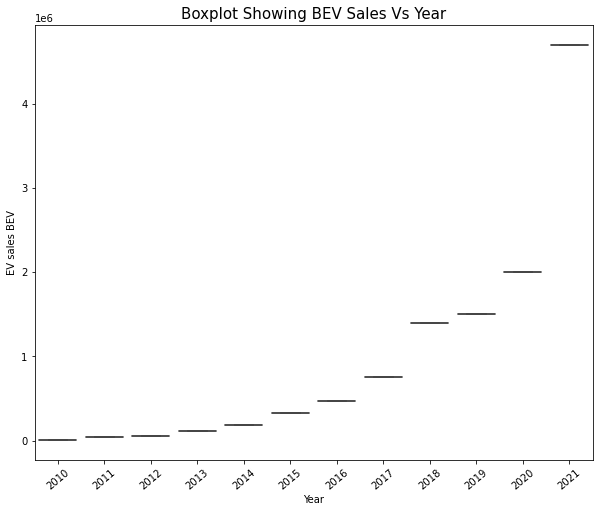

In [9]:
fig, axs = plt.subplots(figsize = (10,8))
plot =sns.boxplot(x='Year', y ='EV sales BEV', data=Car_Data, ax=axs)
plot = plot.set_xticklabels(plot.get_xticklabels(), rotation =40);
plt.title('Boxplot Showing BEV Sales Vs Year', size=15)

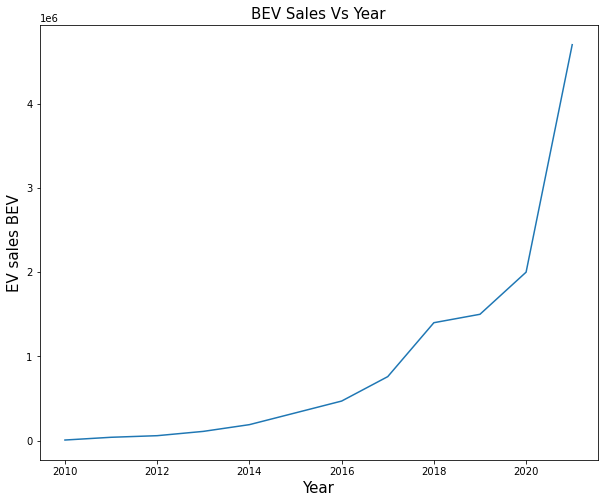

In [10]:
fig, axs = plt.subplots(figsize = (10,8))
plt.plot(Car_Data['Year'], Car_Data['EV sales BEV'])
plt.xlabel('Year', size=15)
plt.ylabel('EV sales BEV', size=15);
plt.title('BEV Sales Vs Year', size=15)
plt.show()

<AxesSubplot:>

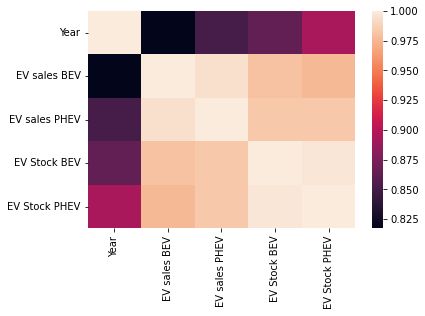

In [11]:
# showing correlations of features
sns.heatmap(EV_Cars.corr())

In [12]:
# splitting the dataset into training set and testing set
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=0)

In [46]:
# Creating instance of class for Linear Regression model
Regress = LinearRegression()

In [50]:
# Training and Evaluating Regression model
Regress.fit(X_train, Y_train)
Y_pred = Regress.predict(X_test)
print('Linear_Regression: ', Y_pred, '\n')
print('R2_Score: ', r2_score(Y_pred, Y_test))
print('Mean_Squared_Error: ', np.sqrt(mean_squared_error(Y_pred, Y_test)))
print('Mean_Absolute_Error: ', mean_absolute_error(Y_pred, Y_test))
print('Coefficent: ', Regress.coef_, '\n''intercept: ', Regress.intercept_)

Linear_Regression:  [ 464897.78056333 4999932.25711554  158287.8185621  2558421.93932074] 

R2_Score:  0.9732370472670805
Mean_Squared_Error:  317342.9203038466
Mean_Absolute_Error:  223792.149327714
Coefficent:  [-2.95080427e+04  2.00853991e+00  3.55971669e-01 -4.64623445e-01] 
intercept:  59319814.279740274


In [51]:
# predicted BEV sales based on the 30% test data
Y_pred

array([ 464897.78056333, 4999932.25711554,  158287.8185621 ,
       2558421.93932074])

In [52]:
# Comparing result of Y_test to our predict y (Y_test)
Y_test

array([ 470000, 4700000,  190000, 2000000], dtype=int64)

In [53]:
# Array of 30% data used for test the Linear Regression model
# note that these datas won't appear in the training data (X_train) indicating they were fulling set aside for testing
X_test

array([[    2016,   290000,  1200000,   810000],
       [    2021,  1900000, 11000000,  5200000],
       [    2014,   130000,   410000,   300000],
       [    2020,   980000,  6900000,  3400000]], dtype=int64)

In [54]:
# Array of 70% data used to train the Linear Regression model

X_train

array([[   2012,   61000,  120000,   70000],
       [   2018,  640000, 3300000, 1800000],
       [   2011,    9100,   55000,    9500],
       [   2017,  420000, 1900000, 1200000],
       [   2019,  580000, 4800000, 2400000],
       [   2013,   92000,  230000,  160000],
       [   2010,     380,   17000,     400],
       [   2015,  220000,  730000,  520000]], dtype=int64)

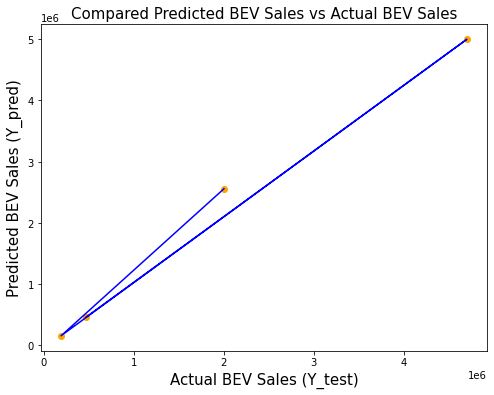

In [65]:
fig = plt.figure(figsize=(8,6))
plt.scatter(Y_test, Y_pred, c= 'orange')
plt.plot(Y_test, Y_pred, c= 'blue')
plt.xlabel('Actual BEV Sales (Y_test)', fontsize=15)
plt.ylabel('Predicted BEV Sales (Y_pred)', size= 15)
plt.title('Compared Predicted BEV Sales vs Actual BEV Sales', fontsize=15)
plt.show()
